In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fair_odds(prob):
    if prob>0: 
        return 1/prob
    else: 
        return print( "Probability must be greater than 0" )

### This is s prototype sports betting simulation framework, to estimate prices for joint events
Lets assume there are two teams A and B, and there is a favorite player in Team A.

As I do not have real data atm, I will be simulating distributions.
Normal (smoother) for team points
Poisson (quantized) for number of goals by favorite player

In [ ]:
# assuminh normal distribution for team points
#googled data for Collingwood Magpies and Carlton Blues (AFL teams)
teamA_mean=88
teamA_std=29
teamB_mean=74
teamB_std=24


In [5]:
# Poisson distribution for favorite player's distribution of goals across many matches
#googled data for Collingwood's star player Jamie Elliott (farward player)
fav_playerA_lambda=1.34 # average goals per match

### defining correlation between team A points and Team A's favorite player's goals.
I will  us this correlation to simulate "correlated" distribution of Team A points and favorite  player goal's

If we had the actual historical data, the data distribution would intrinsically have this coorelation and we could compute the correlation directly.

In [6]:
#assuming coorelation coefficient between team A points and favorite player goals
rho_corr=0.4

simulate random variables - Team A Points, Team B Points, Fav Player A Goals- Monte Carlo (random/stochastic) Simulations


In [ ]:
#np.random.seed(42) #for reproducibility
num_simulations=10000

team A is supposed to be correlated with fav_player by rho_corr, so we build a biavariate gaussian distribution that has this correlation.
We then use this biavariate gaussian distribution to modulate the individual distributions of Team A points and Fav Player goals 
so that we have two random variables that are correlated according to rho_corr.

In [8]:
#create correlated bivariate standard normal distribution (mean=0, std dev=1) for Team A points and Fav Player goals
corr_mean=[0,0]
cov_matrix=[[1,rho_corr],[rho_corr,1]]
corr_distribution=np.random.multivariate_normal(corr_mean,cov_matrix,num_simulations)
print(corr_distribution.shape)

(10000, 2)


In [9]:
#simulating team A points distribution 
teamA_points_dist=teamA_mean + teamA_std*corr_distribution[:,0]
print(len(teamA_points_dist))

10000


(array([4.000e+00, 8.000e+00, 2.000e+01, 4.000e+01, 7.000e+01, 1.610e+02,
        2.290e+02, 4.100e+02, 5.680e+02, 7.450e+02, 9.320e+02, 1.031e+03,
        1.085e+03, 1.129e+03, 1.015e+03, 8.360e+02, 6.550e+02, 4.080e+02,
        2.830e+02, 1.770e+02, 1.120e+02, 3.900e+01, 2.500e+01, 1.400e+01,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3.56724467, -3.28636867, -3.00549267, -2.72461667, -2.44374067,
        -2.16286467, -1.88198867, -1.60111267, -1.32023666, -1.03936066,
        -0.75848466, -0.47760866, -0.19673266,  0.08414334,  0.36501934,
         0.64589534,  0.92677134,  1.20764734,  1.48852334,  1.76939934,
         2.05027534,  2.33115134,  2.61202734,  2.89290334,  3.17377934,
         3.45465534,  3.73553134,  4.01640734,  4.29728335,  4.57815935,
         4.85903535]),
 <BarContainer object of 30 artists>)

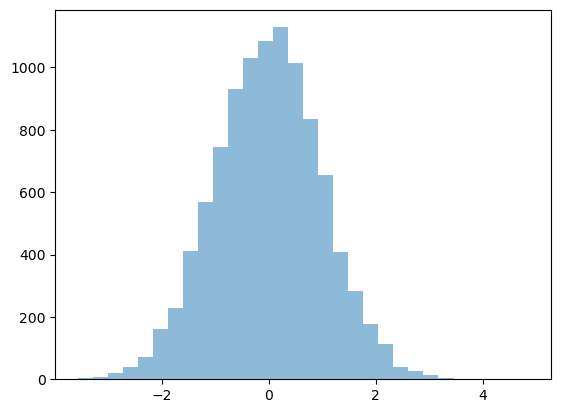

In [60]:
plt.hist(corr_distribution[:,1], bins=30, alpha=0.5, label='Team A Points Std Dev')

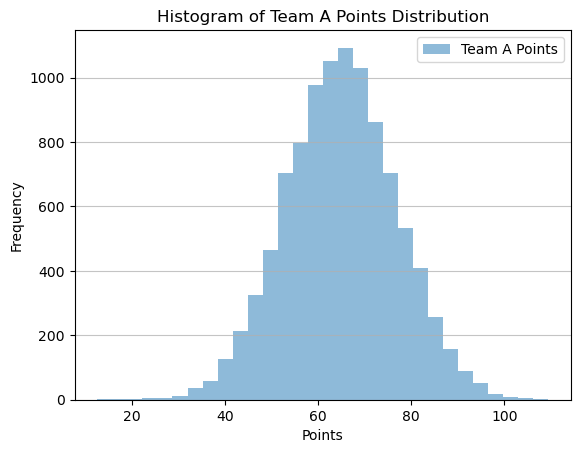

In [ ]:
plt.hist(teamA_points_dist, bins=30, alpha=0.5, label='Team A Points')
plt.title("Histogram of Team A Points Distribution")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [10]:
#simulating team B points distribution 
teamB_points_dist=np.random.normal(teamB_mean,teamB_std,num_simulations)
print(len(teamB_points_dist))

10000


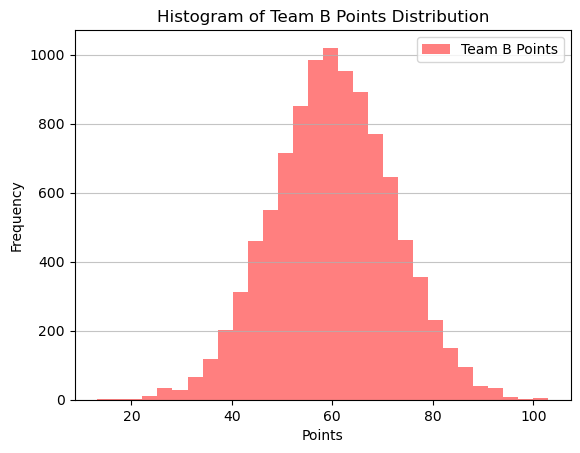

In [58]:
plt.hist(teamB_points_dist, bins=30, alpha=0.5, color='r', label='Team B Points')
plt.title("Histogram of Team B Points Distribution")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

favorite player goals distribution. This is dynamic and correlated with team A points.
Some players of more volatile than others, so we include an extra variation in the player goal distribution using
parameter "player_volatality".

We modify players averag goal by volatality parameter, and then generate poisson distribution

In [51]:
#favorite player goals distribution (has to be dynamic and correlated with team A points)
player_volatality=0.5  #0 is none and 1 is high

fav_playerA_lambda_sim=fav_playerA_lambda*np.exp(player_volatality*corr_distribution[:,1])

fav_playerA_goals_dist=np.random.poisson(fav_playerA_lambda_sim)
print(len(fav_playerA_goals_dist))

10000


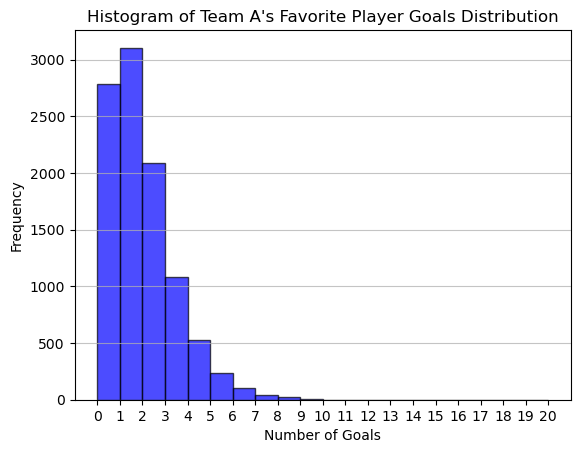

In [52]:
plt.hist(fav_playerA_goals_dist, bins=range(0, max(fav_playerA_goals_dist)+1), alpha=0.7, color='blue', edgecolor='black')
plt.title("Histogram of Team A's Favorite Player Goals Distribution")
plt.xlabel("Number of Goals")
plt.ylabel("Frequency")
plt.xticks(range(0, max(fav_playerA_goals_dist)+1))
plt.grid(axis='y', alpha=0.75)
plt.show()

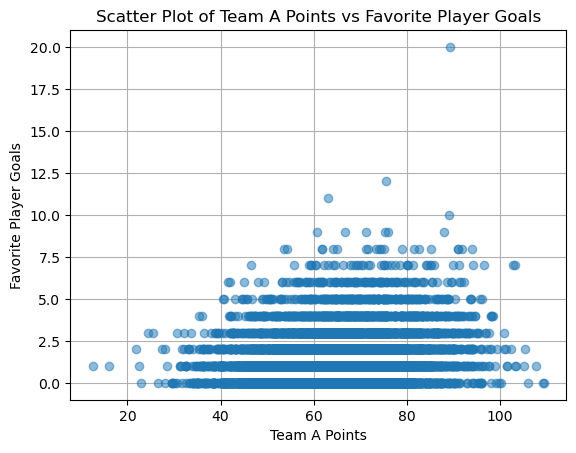

In [53]:
plt.plot(teamA_points_dist, fav_playerA_goals_dist, 'o', alpha=0.5)
plt.title("Scatter Plot of Team A Points vs Favorite Player Goals")
plt.xlabel("Team A Points")
plt.ylabel("Favorite Player Goals")
plt.grid()
plt.show()

### Now that we have distribution of Team points and play goals, lets defined events that users will bet upon

Following will return array with boolean 1,0 elements

In [85]:
#Team A wins
team_A_wins=teamA_points_dist>teamB_points_dist
#Team B wins
team_B_wins=teamB_points_dist>teamA_points_dist
#draw
draw=teamA_points_dist==teamB_points_dist

#favorite player from Team A  scores >=2 goals
fav_playerA_scores_g2=fav_playerA_goals_dist>=2

#favorite player from Team A  scores 0 or 1 goal
fav_playerA_scores_0_1 =fav_playerA_goals_dist<=1

#joint event: Team A wins AND favorite player scores >=2 goals
joint_event=team_A_wins & fav_playerA_scores_g2


## Calculate Probabilities of various event
probability=(numer of positive outcomes of an event)/(total number of trials)

In [86]:
prob_teamA_wins=np.mean(team_A_wins)
prob_teamB_wins=np.mean(team_B_wins)
prob_draw=np.mean(draw)


prob_fav_playerA_scores_g2=np.mean(fav_playerA_scores_g2)
prob_fav_playerA_scores_0_1=np.mean(fav_playerA_scores_0_1)

prob_joint_event=np.mean(joint_event)
prob_no_joint_event=1 - prob_joint_event

print(f"Probability Team A wins: {prob_teamA_wins:.4f}")
print(f"Probability Team B wins: {prob_teamB_wins:.4f}")
print(f"Probability Draw: {prob_draw:.4f}")

print(f"Probability Fav Player A scores >=2 goals: {prob_fav_playerA_scores_g2:.4f}")
print(f"Probability Fav Player A scores <=1 goals: {prob_fav_playerA_scores_0_1:.4f}")

print(f"Probability Joint Event (Team A wins and Fav Player A scores >=2 goals): {prob_joint_event:.4f}")
print(f"Probability No Joint Event: {prob_no_joint_event:.4f}")


Probability Team A wins: 0.6109
Probability Team B wins: 0.3891
Probability Draw: 0.0000
Probability Fav Player A scores >=2 goals: 0.4109
Probability Fav Player A scores <=1 goals: 0.5891
Probability Joint Event (Team A wins and Fav Player A scores >=2 goals): 0.2735
Probability No Joint Event: 0.7265


In case wining of Team A and scoring of favorite player was independent.

In [22]:
prob_independent_events = prob_teamA_wins * prob_fav_playerA_scores_g2
print(f"Probability if Independent Events (Team A wins and Fav Player A scores >=2 goals): {prob_independent_events:.4f}")


Probability if Independent Events (Team A wins and Fav Player A scores >=2 goals): 0.1241


# Estimating Odds for some events
Odds= 1/probabitlity

Fair joint odds

In [27]:
fair_odds_joint=fair_odds(prob_joint_event)
print(f"Fair Odds without house cut for Joint Event (Team A wins and Fav Player A scores >=2 goals): {fair_odds_joint:.2f}")

Fair Odds without house cut for Joint Event (Team A wins and Fav Player A scores >=2 goals): 6.97


Include Overround (house margin) in Odds

In [28]:
house_edge=0.05 #5% house edge { this has to account for vig, operational costs, profit margin etc.}
adjusted_odds_joint=fair_odds_joint*(1-house_edge)

print(f"Adjusted Odds for Joint Event (Team A wins and Fav Player A scores >=2 goals): {adjusted_odds_joint:.2f}")


Adjusted Odds for Joint Event (Team A wins and Fav Player A scores >=2 goals): 6.62


In [29]:
print(f"Fair Oddss if Independent Events: {fair_odds(prob_independent_events)*(1-house_edge):.2f}")

Fair Oddss if Independent Events: 7.66


Back calculating vig ..house margin

In [61]:
neg_odds=fair_odds(1-prob_joint_event)*(1-house_edge)
print(f"Adjusted Odds for NOT Joint Event (Team A does not win or Fav Player A scores <2 goals): {neg_odds:.2f}")

Adjusted Odds for NOT Joint Event (Team A does not win or Fav Player A scores <2 goals): 1.11


In [70]:
House_margin_back_calculation = ((1/neg_odds + 1/adjusted_odds_joint) -1)*100
print(f"House Margin back calculation (%): {House_margin_back_calculation:.2f}%")

House Margin back calculation (%): 5.26%


# Risk Analysis

In [73]:
#setting prices /odds for all possible outcomes
betting_markets = {
    'team_A_wins': prob_teamA_wins,
    'team_B_wins': 1 - prob_teamA_wins,
    'player_scores_2+': prob_fav_playerA_scores_g2,
    'player_scores_0-1': 1 - prob_fav_playerA_scores_g2,
    'joint_event': prob_joint_event,
    'joint_event_not_happen': 1 - prob_joint_event
}

In [75]:
#Estimating margin ajusted odds for all betting markets
bookmaker_odds = {market: fair_odds(prob)*(1-house_edge) for market, prob in betting_markets.items()}
print("Bookmaker Odds for various betting markets:")
for market, odds in bookmaker_odds.items():
    print(f"{market}: {odds:.2f}")

Bookmaker Odds for various betting markets:
team_A_wins: 1.56
team_B_wins: 2.44
player_scores_2+: 4.68
player_scores_0-1: 1.19
joint_event: 6.62
joint_event_not_happen: 1.11


Simulating customer bets

In [80]:
all_customer_bets = []
num_customers = 100

np.random.seed(42) #for reproducibility on rerun or other systems
for id in range (num_customers):
    market_choice = np.random.choice(list(betting_markets.keys()))
    bet_amount = np.random.uniform(10, 100)  # Random bet amount between $10 and $100
    market_odds= bookmaker_odds[market_choice]
    customer_bet = {
        'customer_id': id,
        'bet_market':  market_choice,
        'bet_stake': bet_amount, 
        'market_odds': market_odds,
        'potential_payout': bet_amount * market_odds,
        'house_liability': bet_amount * market_odds - bet_amount #net pay from house to customer
    }
    all_customer_bets.append(customer_bet)

Total_stakes = sum(bet['bet_stake'] for bet in all_customer_bets)
print(f"Total number of bets: {len(all_customer_bets)}")
print(f"Total money collected from all customers: ${Total_stakes:.2f}")

Total number of bets: 100
Total money collected from all customers: $4994.84


Calculate Risk

In [81]:
exposure_per_market={}

for bet in all_customer_bets:
    market = bet['bet_market']
    if market not in exposure_per_market:
        exposure_per_market[market] = {'no_bets':0, 'total_stake':0.0, 'total_liability':0.0}
    exposure_per_market[market]['no_bets'] += 1
    exposure_per_market[market]['total_stake'] += bet['bet_stake']
    exposure_per_market[market]['total_liability'] += bet['house_liability']

print("Exposure per betting market:")
for market, exposure in exposure_per_market.items():
    print(f"{market}: Number of Bets: {exposure['no_bets']}, Total Stake: ${exposure['total_stake']:.2f}, Total Liability: ${exposure['total_liability']:.2f}")

Exposure per betting market:
player_scores_0-1: Number of Bets: 25, Total Stake: $1308.99, Total Liability: $251.48
player_scores_2+: Number of Bets: 15, Total Stake: $776.50, Total Liability: $2855.56
joint_event: Number of Bets: 13, Total Stake: $554.45, Total Liability: $3118.71
team_B_wins: Number of Bets: 13, Total Stake: $683.41, Total Liability: $985.16
joint_event_not_happen: Number of Bets: 17, Total Stake: $744.00, Total Liability: $81.12
team_A_wins: Number of Bets: 17, Total Stake: $927.49, Total Liability: $514.83


In the case of mutually exclusive events, only one would win. 
Total liability will be liability associated with that market 
Total stake gained by house will be total of stake remaining markets.
net_value=market_liability - total stake of remaing market

But, in my example all events are not mutually exclusive